In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [9]:
AHe=pd.read_csv("/Users/smoron/Documents/1.Projects/Thermochron/Thermochron_figs&tables_0819/Table_3_1_selected.csv",sep=',', header=0)
samples=np.unique(AHe.Sample_No)

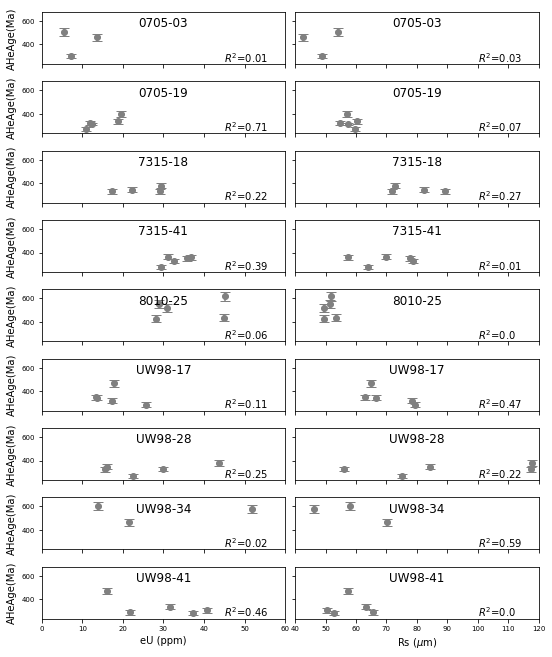

In [69]:

fig, axs = plt.subplots(len(samples),2, figsize=(7.5, 9), sharey='all')
for i in np.arange(0,len(samples),1):
    #eU plots
    ax = axs[i,0]
    ax.set_title(str(samples[i]), pad=-15)
    ax.errorbar(AHe.eU_ppm[AHe.Sample_No==samples[i]], AHe.Corrected_Age_Ma[AHe.Sample_No==samples[i]], yerr=AHe.Corrected_Age_Ma_1s[AHe.Sample_No==samples[i]], fmt='o', capsize=5, c='grey')
    slope, intercept, r_value, p_value, std_err=scipy.stats.linregress(AHe.eU_ppm[AHe.Sample_No==samples[i]], AHe.Corrected_Age_Ma[AHe.Sample_No==samples[i]])
    ax.text(45,250, str('$R^2$=')+str(round(r_value**2,2)))
    ax.set_xlim(0,60)
    ax.set(xlabel='eU (ppm)', ylabel='AHeAge(Ma)')
    ax.tick_params(axis='both', which='major', labelsize=7)

    #Rs plots
    ax = axs[i,1]
    ax.set_title(str(samples[i]), pad=-15)
    ax.errorbar(AHe.Rs_um[AHe.Sample_No==samples[i]], AHe.Corrected_Age_Ma[AHe.Sample_No==samples[i]], yerr=AHe.Corrected_Age_Ma_1s[AHe.Sample_No==samples[i]], fmt='o', capsize=5, c='grey')
    slope, intercept, r_value, p_value, std_err=scipy.stats.linregress(AHe.Rs_um[AHe.Sample_No==samples[i]], AHe.Corrected_Age_Ma[AHe.Sample_No==samples[i]])
    ax.text(100,250, str('$R^2$=')+str(round(r_value**2,2)))
    ax.set_xlim(40,120)
    ax.set(xlabel='Rs ($\mu$m)')
    ax.tick_params(axis='both', which='major', labelsize=7)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
plt.tight_layout(pad=0.10)
fig.savefig("AHe_age_vs_eU_vsRs_datarep.pdf", dpi=300)